In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import expected_max_performance
import numpy as np

In [112]:
data = {
    "DilatedCNN(CH)": "../stats/seq_ch_conv_3lv.yaml-2020-05-15--13-36.30.csv",
    "DilatedCNN(SY)": "../stats/seq_sy_conv_3lv.yaml-2020-05-25--20-43.30.csv",
    "DilatedCNN(CH+SY)": "../stats/seq_sy_ch_conv_3lv.yaml-2020-05-15--22-41.30.csv",
    "DilatedCNN(CH+SY-CBOW)": "../stats/seq_sy_ch_conv_3lv_cow.yaml-2020-05-25--22-45.30.csv",
    "DilatedCNN(CH+SY-Skipgram)": "../stats/seq_sy_ch_conv_3lv_skipgram.yaml-2020-05-25--22-46.30.csv",
    "DilatedCNN(CH+SY)-SchemeA": "../stats/seq_sy_ch_conv_3lv_scheme_a.yaml-2020-05-24--17-49.30.csv",
    "DilatedCNN(CH+SY)-SchemeB": "../stats/seq_sy_ch_conv_3lv_scheme_b.yaml-2020-05-24--17-49.30.csv",
    
#     "UniLSTM(CH)": "../stats/seq_ch_lstm_uni.yaml-2020-05-16--10-14.30.csv",
    "BiLSTM(CH)": "../stats/seq_ch_lstm_bi.yaml-2020-05-22--22-42.30.csv",
    "BiLSTM(CH+SY)": "../stats/seq_sy_ch_lstm_bi.yaml-2020-05-22--22-42.30.csv",
    "BiLSTM(CH+SY)-SchemeA": "../stats/seq_sy_ch_lstm_scheme_a.yaml-2020-05-24--17-52.30.csv",
    "BiLSTM(CH+SY)-SchemeB": "../stats/seq_sy_ch_lstm_scheme_b.yaml-2020-05-24--17-52.30.csv",
    "BiLSTM(CH+SY)-CRF": "../stats/seq_sy_ch_lstm_bi_crf.yaml-2020-05-23--13-12.10.csv",
    "BiLSTM(SY)": "../stats/seq_sy_lstm_bi.yaml-2020-05-22--22-42.30.csv",
}


----
seq_ch_conv_3lv size=329152
Val WL-F1=0.9466 ./artifacts/seq_ch_conv_3lv.yaml-2020-05-15--13-36.30/run-23
TEST: CL-f1=0.9684 WL-f1=0.9226
conv:214|do:0.023654636978421406|embc:32|embt:32|l1:36|oc:BI lr=4.87e-05 weight_decay=1.64e-06
avg traiing 67.53779174486796
----
seq_sy_conv_3lv size=520678
Val WL-F1=0.9555 ./artifacts/seq_sy_conv_3lv.yaml-2020-05-25--20-43.30/run-28
TEST: CL-f1=0.9715 WL-f1=0.9304
conv:126|do:0.1292870335308165|embs:64|l1:18|oc:BI lr=6.15e-04 weight_decay=8.84e-05
avg traiing 24.53267930905024
----
seq_sy_ch_conv_3lv size=574875
Val WL-F1=0.9723 ./artifacts/seq_sy_ch_conv_3lv.yaml-2020-05-15--22-41.30/run-13
TEST: CL-f1=0.9800 WL-f1=0.9501
conv:137|do:0.0929509300900459|embc:32|embs:64|embt:32|l1:42|oc:BI lr=4.65e-04 weight_decay=1.06e-06
avg traiing 52.203595696290336
----
seq_ch_lstm size=1629805
Val WL-F1=0.9430 ./artifacts/seq_ch_lstm_bi.yaml-2020-05-22--22-42.30/run-29
TEST: CL-f1=0.9690 WL-f1=0.9203
bi:1|cells:416|do:0.4279045889213156|embc:32|embt:32|l

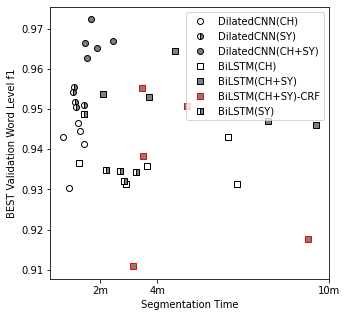

In [118]:

def marker(k):
    if "CNN" in k:
        return "o"
    elif "UniLSTM" in k:
        return "*"
    elif "BiLSTM" in k:
        return "s"
    
def markercolor(k):
    if "SY" in k:
        if "SchemeA" in k:
            return "#FDB90A"
        elif "SchemeB" in k:
            return "#25CFFF"
        elif "CBOW" in k:
            return "red"
        elif "Skipgram" in k:
            return "blue"
        else: 
            return "gray"
    else:
        return "white"
    
def plot_hyperopt(families, n=10):
    plt.figure(figsize=(5, 5))
    # draw max line
    for k in families:
        df = pd.read_csv(data[k]).sort_values(by="best-val:word_level:f1", ascending=False)[:n]
        
        best_model = df[df["best-val:word_level:f1"] == df["best-val:word_level:f1"].max()].to_dict("row")[0]
        print("----")

        print(best_model["name"], "size=%d" % best_model["num_trainable_params"])
        print("Val WL-F1=%.4f" % best_model["best-val:word_level:f1"], best_model["best-val:model_path"])
        print("TEST: CL-f1=%.4f" % best_model["best-test:char_level:f1"], "WL-f1=%.4f" % best_model["best-test:word_level:f1"])
        print(best_model["params"], "lr=%.2e"%best_model["lr"], "weight_decay=%.2e" % best_model["weight_decay"],)
        print("avg traiing", df["training_took"].mean()/60)
        plt.plot(
            df["best-val:time_took"] / 60 , df["best-val:word_level:f1"],
            lw=0,
            label=k,
            marker=marker(k),
            markeredgecolor="red" if "CRF" in k else "black",
            markerfacecolor=markercolor(k),
#             "gray" if "SY" in k else "white",
            fillstyle="right" if "(SY)" in k else "full",
            markerfacecoloralt="white"
        )

    plt.ylabel("BEST Validation Word Level f1")
    plt.xlabel("Segmentation Time")
    plt.xticks([2, 4, 10], ["2m", "4m", "10m"])
    
#     pythai_wlf1 = 0.70
#     plt.text(6.6, pythai_wlf1 + 0.005, "PyThaiNLP's newmm (dummy)", style='italic')
#     plt.axhline(pythai_wlf1, ls="--", color="gray", lw=1, zorder=0)
    
    
#     deepcut_wlf1 = 0.96
#     plt.text(8.6, deepcut_wlf1 + 0.005, "DeepCut (dummy)", style='italic')
#     plt.axhline(deepcut_wlf1, ls="--", color="gray", lw=1, zorder=0)
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend()
    
plot_hyperopt([
    "DilatedCNN(CH)",
    "DilatedCNN(SY)",
    "DilatedCNN(CH+SY)",
#     "DilatedCNN(CH+SY-CBOW)",
#     "DilatedCNN(CH+SY-Skipgram)",
    "BiLSTM(CH)",
    "BiLSTM(CH+SY)",
    "BiLSTM(CH+SY)-CRF",
    "BiLSTM(SY)"
], n=5)

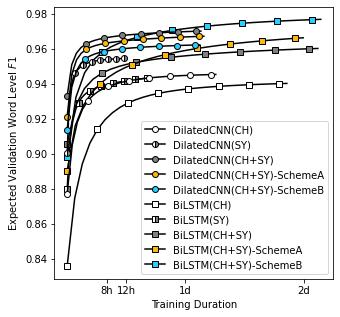

In [117]:
def plot_expected_perf(families):
    plt.figure(figsize=(5, 5))
#     plt.axvline(8, ls="--", zorder=0, color="black", lw=1)
#     plt.axvline(26, ls="--", zorder=0, color="black", lw=1)
    for k in families:
        df = pd.read_csv(data[k])
        exp_perf = expected_max_performance.samplemax(df["best-val:word_level:f1"])
        mean = np.array(exp_perf["mean"])
        std = np.array(exp_perf["var"])
        _min, _max = exp_perf["min"], exp_perf["max"]
        avg_time = (df["training_took"] / (60*60)).mean()
        x = np.arange(0, df.shape[0]) * avg_time
        plt.plot(
            x, 
            exp_perf["mean"],
            marker=marker(k), 
            label=k,
            markevery=4,
            markerfacecolor=markercolor(k),
            color="black",
            zorder=1 if "CNN" in k else 0,
            fillstyle="right" if "(SY)" in k else "full",
            markerfacecoloralt="white"
        )
        
#         plt.fill_between(
#             x,
#             np.where(mean - std > _min, mean - std, _min),
#             np.where(mean + std < _max, mean + std, _max),
#             color="gray",
#             alpha=0.2,
#             zorder=0,
#         )
#     plt.ylim(0.8)
    plt.ylabel("Expected Validation Word Level ${F1}$")
    plt.xlabel("Training Duration")
    plt.xticks([8, 12, 24, 48], ["8h", "12h", "1d", "2d"])
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend()
    
plot_expected_perf([
    "DilatedCNN(CH)",
    "DilatedCNN(SY)",
    "DilatedCNN(CH+SY)",
#     "DilatedCNN(CH+SY-CBOW)",
#     "DilatedCNN(CH+SY-Skipgram)",
    "DilatedCNN(CH+SY)-SchemeA",
    "DilatedCNN(CH+SY)-SchemeB",
    "BiLSTM(CH)",
    "BiLSTM(SY)",
    "BiLSTM(CH+SY)",
    "BiLSTM(CH+SY)-SchemeA",
    "BiLSTM(CH+SY)-SchemeB",
])
plt.savefig("./figures/expected_val_perf.png", dpi=300)

## Schema A and B models

----
seq_sy_ch_conv_3lv size=574875
Val WL-F1=0.9723 ./artifacts/seq_sy_ch_conv_3lv.yaml-2020-05-15--22-41.30/run-13
TEST: CL-f1=0.9800 WL-f1=0.9501
conv:137|do:0.0929509300900459|embc:32|embs:64|embt:32|l1:42|oc:BI lr=4.65e-04 weight_decay=1.06e-06
avg traiing 62.082446708281836
----
seq_sy_ch_conv_3lv size=665543
Val WL-F1=0.9697 ./artifacts/seq_sy_ch_conv_3lv_scheme_a.yaml-2020-05-24--17-49.30/run-24
TEST: CL-f1=0.9793 WL-f1=0.9484
conv:177|do:0.11905739983075092|embc:32|embs:64|embt:32|l1:31|oc:SchemeA lr=9.36e-04 weight_decay=4.60e-05
avg traiing 58.39501771688461
----
seq_sy_ch_conv_3lv size=568682
Val WL-F1=0.9636 ./artifacts/seq_sy_ch_conv_3lv_scheme_b.yaml-2020-05-24--17-49.30/run-3
TEST: CL-f1=0.9774 WL-f1=0.9440
conv:134|do:0.06434694298847987|embc:32|embs:64|embt:32|l1:40|oc:SchemeB lr=2.25e-04 weight_decay=2.69e-05
avg traiing 50.11373278776805
----
seq_sy_ch_lstm size=1209891
Val WL-F1=0.9645 ./artifacts/seq_sy_ch_lstm_bi.yaml-2020-05-22--22-42.30/run-19
TEST: CL-f1=0.975

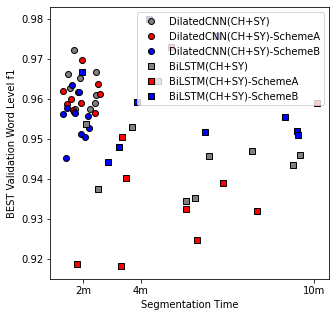

In [37]:
plot_hyperopt([
    "DilatedCNN(CH+SY)",
    "DilatedCNN(CH+SY)-SchemeA",
    "DilatedCNN(CH+SY)-SchemeB",
    "BiLSTM(CH+SY)",
    "BiLSTM(CH+SY)-SchemeA",
    "BiLSTM(CH+SY)-SchemeB",
], n=10)

In [39]:
df_ = pd.read_csv(data["DilatedCNN(CH+SY)"])
df_a = pd.read_csv(data["DilatedCNN(CH+SY)-SchemeA"])

In [40]:
from scipy import stats

------
t-test(DilatedCNN(CH+SY), DilatedCNN(SY))
Ttest_indResult(statistic=2.664590989966595, pvalue=0.010411693344259104)
H0: two model families perform equally well (means of WL-F1 are the same, and variance isn't assumed to be equal)
⚠️Reject H0: there is significant evidence that the means of WL-F1 from the two models are significantly different.
pvalue=0.010411693344259104 < 0.5


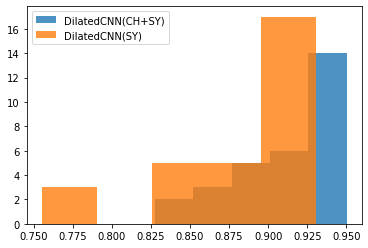

In [109]:
col = "best-test:word_level:f1"

def ttest(d1, d2):
    print('------')
    print(f"t-test({d1}, {d2})")
    
    df_ = pd.read_csv(data[d1])
    df_a = pd.read_csv(data[d2])
    plt.hist(df_[col], label=d1, alpha=0.8, bins=5)
    plt.hist(df_a[col], label=d2, alpha=0.8, bins=5)
    plt.legend()
    res = stats.ttest_ind(df_[col], df_a[col], equal_var=False)
    print(res)
    if res.pvalue < 0.05:
        print("H0: two model families perform equally well (means of WL-F1 are the same, and variance isn't assumed to be equal)")
        print("⚠️Reject H0: there is significant evidence that the means of WL-F1 from the two models are significantly different.")
        print(f"pvalue={res.pvalue} < 0.5")
        
# ttest("BiLSTM(CH+SY)", "DilatedCNN(CH+SY)")
ttest("DilatedCNN(CH+SY)", "DilatedCNN(SY)")

# ttest("DilatedCNN(CH+SY)", "DilatedCNN(CH+SY)-SchemeA")
# ttest("DilatedCNN(CH+SY)", "DilatedCNN(CH+SY)-SchemeB")

# ttest("BiLSTM(CH+SY)", "BiLSTM(CH)")
# ttest("BiLSTM(CH+SY)", "BiLSTM(SY)")
# ttest("BiLSTM(CH+SY)-SchemeB", "BiLSTM(SY)")
# ttest("BiLSTM(CH+SY)", "BiLSTM(CH+SY)-SchemeA")
# ttest("BiLSTM(CH+SY)", "BiLSTM(CH+SY)-SchemeB")

In [17]:
def read_scheme_model(path):
    print(path)
    data = pd.read_csv(path)
    print("Test", "CL-f1=%.4f" % data["best-test:char_level:f1"], "WL-f1=%.4f" % data["best-test:word_level:f1"])
read_scheme_model("../stats/seq_sy_ch_lstm_scheme_a.yaml-2020-05-24--10-39.1.csv")

../stats/seq_sy_ch_lstm_scheme_a.yaml-2020-05-24--10-39.1.csv
Test CL-f1=0.9724 WL-f1=0.9295


In [18]:
read_scheme_model("../stats/seq_sy_ch_lstm_scheme_b.yaml-2020-05-24--10-39.1.csv")

../stats/seq_sy_ch_lstm_scheme_b.yaml-2020-05-24--10-39.1.csv
Test CL-f1=0.9732 WL-f1=0.9325


In [19]:
read_scheme_model("../stats/seq_sy_ch_conv_3lv_scheme_a.yaml-2020-05-24--11-01.1.csv")

../stats/seq_sy_ch_conv_3lv_scheme_a.yaml-2020-05-24--11-01.1.csv
Test CL-f1=0.9771 WL-f1=0.9429


In [20]:
read_scheme_model("../stats/seq_sy_ch_conv_3lv_scheme_b.yaml-2020-05-24--11-01.1.csv")

../stats/seq_sy_ch_conv_3lv_scheme_b.yaml-2020-05-24--11-01.1.csv
Test CL-f1=0.9755 WL-f1=0.9400
